In [1]:
!pip install mtcnn
!pip install -q kaggle
!pip install keras_vggface
!pip install keras_applications
!pip install tensorflow==2.4.1
!pip install keras==2.4.3

     |████████████████████████████████| 2.3 MB 23.1 MB/s 
     |████████████████████████████████| 50 kB 5.2 MB/s 
     |████████████████████████████████| 394.3 MB 13 kB/s 
     |████████████████████████████████| 462 kB 51.3 MB/s 
     |████████████████████████████████| 132 kB 54.1 MB/s 
     |████████████████████████████████| 14.8 MB 43.2 MB/s 
     |████████████████████████████████| 3.8 MB 7.6 MB/s 
     |████████████████████████████████| 2.9 MB 42.1 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68723 sha256=21dfd6f0f5ab674876e1a3ad1411cabca52cf50fe35a8e94a28da7b79d7726a9
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found e

  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np
from keras_vggface.utils import preprocess_input 
from scipy.spatial.distance import cosine
from keras_vggface.vggface import VGGFace

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gimnath","key":"f7e005f704f294b59092ed96be72c9d8"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s faces

ref                                              title                                      size  lastUpdated          downloadCount  
-----------------------------------------------  ----------------------------------------  -----  -------------------  -------------  
andrewmvd/animal-faces                           Animal Faces                              696MB  2020-05-22 06:49:01           4837  
ashwingupta3012/human-faces                      Human Faces                                 2GB  2020-09-21 04:09:12           3823  
soumikrakshit/anime-faces                        Anime Faces                               441MB  2019-05-16 10:38:47           6183  
kostastokis/simpsons-faces                       Simpsons Faces                            442MB  2018-09-28 17:38:04           6264  
selfishgene/youtube-faces-with-facial-keypoints  YouTube Faces With Facial Keypoints        16GB  2021-10-06 03:11:11           8649  
dansbecker/5-celebrity-faces-dataset             5 Cele

In [ ]:
!kaggle datasets download -d dansbecker/5-celebrity-faces-dataset   

 99% 5.00M/5.03M [00:00<00:00, 22.3MB/s]
100% 5.03M/5.03M [00:00<00:00, 20.0MB/s]


In [ ]:
!unzip 5-celebrity-faces-dataset.zip

Archive:  5-celebrity-faces-dataset.zip
  inflating: data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: data/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: data/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg  
  inflating: data/train/ben_afflek/httptrwebimgacstanetcxbdddmediasnmediajpg.jpg  
  inflating: data/train/ben_afflek/httpwwwaceshowbizcomimagesphotobenaffleckjp

In [ ]:
image = cv2.imread('data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')

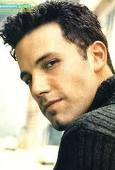

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
  print(face)

{'box': [20, 35, 71, 88], 'confidence': 0.9996923208236694, 'keypoints': {'left_eye': (29, 73), 'right_eye': (54, 63), 'nose': (37, 90), 'mouth_left': (42, 108), 'mouth_right': (63, 100)}}


In [ ]:
def create_bbox(image):
  faces = detector.detect_faces(image)
  # bounding_box = faces[0]['box']
  x, y, width, height = faces[0]['box']

  cv2.rectangle(image, 
                (x, y, 
                 width, height),
                (0,155,155),
              2)
  return image  

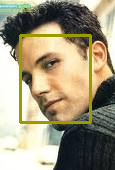

In [ ]:
cv2_imshow(create_bbox(image))

In [ ]:
# Extract face from a person
def extract_face(image, resize =(224,224)):
  image = cv2.imread(image)
  faces = detector.detect_faces(image)
  x1, y1, width, height = faces[0]['box']
  x2, y2 = x1 + width, y1 + height

  face_boundary = image[y1:y2, x1:x2]
  face_image = cv2.resize(face_boundary, resize)

  return face_image

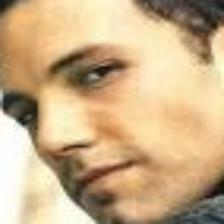

In [ ]:
face_image = extract_face('data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
cv2_imshow(face_image)

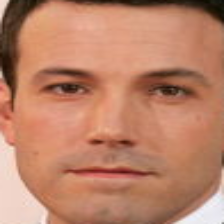

In [ ]:
face_image = extract_face('data/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg')
cv2_imshow(face_image)

Original image


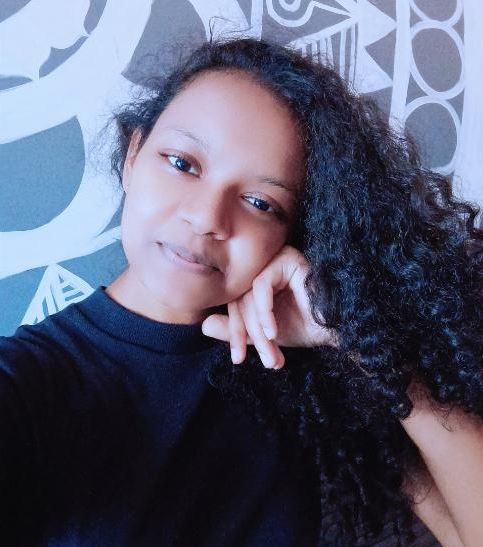

In [ ]:
# Read original image
real_image = cv2.imread('achee.JPG');
print('Original image')

cv2_imshow(real_image)

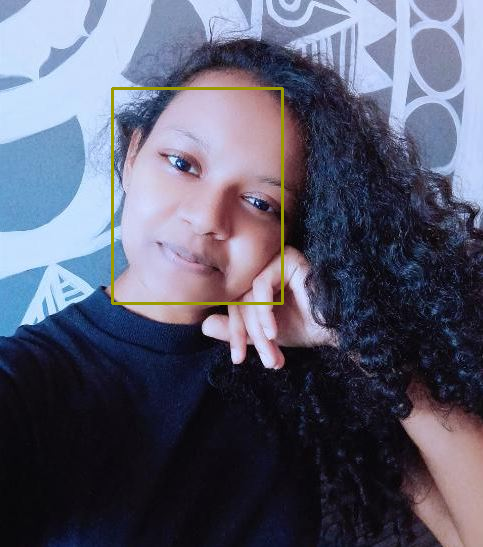

In [ ]:
# Detecting the face 
cv2_imshow(create_bbox(real_image))

Extracted face image


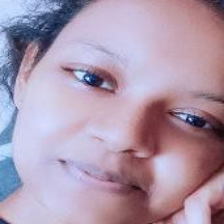

In [ ]:
print('Extracted face image')
face_image = extract_face('achee.JPG')
cv2_imshow(face_image)

In [ ]:
def get_embedding(faces):
  face = np.asarray(faces, 'float32')

  face = preprocess_input(face, version=2)
  model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

  return model.predict(face)

In [ ]:
def get_similarity(faces):
  embeddings = get_embedding(faces)

  score = cosine(embeddings[0], embeddings[1])

  if(score<=0.5):
    return "Face Matched: ", score
  
  return "Face Not Matched: ", score

In [ ]:
#  Images of same person
macth_face_list = ['gimnath.jpg', 'gimnath.PNG']
match_face_set = [extract_face(image) for image in macth_face_list]
get_similarity(match_face_set)

('Face Matched: ', 0.1770445704460144)

In [ ]:
#  Images of different people
non_macth_face_list = ['gimnath.jpg', 'achee.JPG']
non_match_face_set = [extract_face(image) for image in non_macth_face_list]
get_similarity(non_match_face_set)

('Face Not Matched: ', 0.5688691437244415)

In [ ]:
# ==================== Prediction ==========================

In [1]:
# Importing required packages
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np
from keras_vggface.utils import preprocess_input 
from scipy.spatial.distance import cosine
from keras_vggface.vggface import VGGFace

In [2]:
detector = MTCNN()

In [3]:
# Draw rectangle on detected face
def draw_face_box(image):
  faces = detector.detect_faces(image)
  x, y, width, height = faces[0]['box']

  cv2.rectangle(image, 
                (x, y, 
                 width, height),
                (0,155,155),
              2)
  return image  

In [4]:
# Extract face from a person
def extract_face(image, resize =(224,224)):
  image = cv2.imread(image)
  faces = detector.detect_faces(image)
  x1, y1, width, height = faces[0]['box']
  x2, y2 = x1 + width, y1 + height

  face_boundary = image[y1:y2, x1:x2]
  face_image = cv2.resize(face_boundary, resize)

  return face_image

In [5]:
# Extract features from the detected face
def get_embedding(faces):
  face = np.asarray(faces, 'float32')

  # Preprocessing the image
  face = preprocess_input(face, version=2)
  # Adding transfer learning
  model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

  # Predict the image and return the prediction
  return model.predict(face)

In [6]:
# Get similarity between provided 2 images 
def get_similarity(faces):
  embeddings = get_embedding(faces)

  score = cosine(embeddings[0], embeddings[1])

  if(score<=0.5):
    return "Face Matched: ", score
  
  return "Face Not Matched: ", score

In [8]:
# Verify face
def verify_face(old_image, new_image):
  macth_face_list = [old_image, new_image]
  match_face_set = [extract_face(image) for image in macth_face_list]

  return get_similarity(match_face_set)

In [9]:
print(verify_face('achee.JPG', 'achee2.JPG'))

94699520/94694792 [==============================] - 1s 0us/step
('Face Matched: ', 0.32269221544265747)


In [10]:
print(verify_face('gimnath.jpg', 'achee2.JPG'))

('Face Matched: ', 0.49374639987945557)
